In [0]:
# activate R magic
%load_ext rpy2.ipython


##Massa de dados aleatória

###Criando a massa de dados (apesar de aleatória, *Y* possui uma relação com dados de *X*)

In [0]:
%%R
  # Criar dados de maneira aleatória é uma boa estratégia para testar o modelo de Machine Learning
  x <- seq(0, 100)
  y <- 2 * x + 35

In [39]:
%%R
# Imprimir a variável x
x

  [1]   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
 [19]  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
 [37]  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
 [55]  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
 [73]  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
 [91]  90  91  92  93  94  95  96  97  98  99 100


In [40]:
%%R
# Imprimir a variável y
y

  [1]  35  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69
 [19]  71  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105
 [37] 107 109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141
 [55] 143 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177
 [73] 179 181 183 185 187 189 191 193 195 197 199 201 203 205 207 209 211 213
 [91] 215 217 219 221 223 225 227 229 231 233 235


In [0]:
%%R
# Gerar uma distribuição normal para gravar em y1, são valores aleatórios, uma massa de dados de Teste. 
# A massa de dados não pode ser totalmente arbitrária, porque senão os testes podem não ser promissores. 
y1 <- y + rnorm(101, 0, 50)

In [42]:
%%R
# Imprimir a variável y1
y1

  [1]  87.955097  -6.160964 -21.474531 -21.285141 114.090077 -32.733172
  [7] 131.184319 220.467202  64.511025  24.367628  67.224781  77.827406
 [13]  83.428499   9.235310  95.869956  57.825499  90.507860  94.883379
 [19]  29.417119  84.832270  47.274236  34.903111   4.052896  65.794189
 [25] 124.990068  32.986050 130.732577  94.024239  54.398234 134.921235
 [31]  79.741230 138.461220 105.778124  15.547922  53.467680  72.626552
 [37] 124.854863  96.612706  58.229605 145.869018 122.938340 141.269654
 [43]  65.087980  81.062921 206.651329 132.144297 131.448953  85.483273
 [49] 168.440567 135.058998  80.251975 133.544036 100.350391  55.241596
 [55]  91.439384 195.406488 182.612992 129.869448 223.754664  88.467684
 [61] 319.002626 237.141579 154.471404 192.650988 200.458197 170.378775
 [67] 121.773144 178.263818 170.826193 153.996896 137.182584 131.300894
 [73] 243.445942 140.992073 147.198476 171.451715  21.991174 136.009323
 [79] 132.228474 138.453238 245.465467 127.841401 314.409758 254

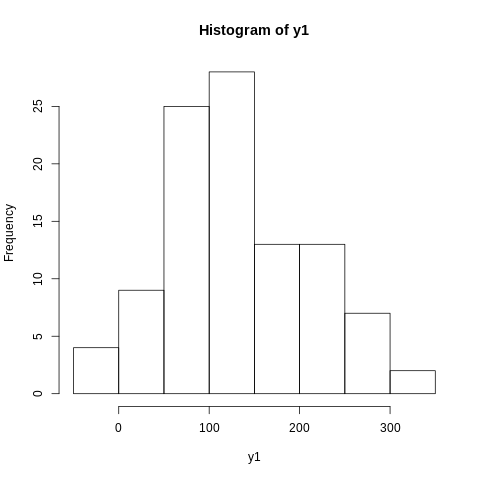

In [43]:
%%R
hist(y1) # Temos algo perto de uma distribuição normal

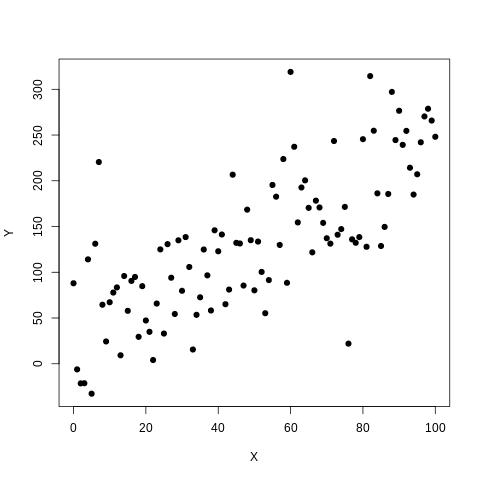

In [44]:
%%R
# Criar um plot de dispersão do relacionamento de x e y1
plot(x, y1, pch = 19, xlab = 'X', ylab = 'Y')
# Olhando para o gráfico é possível detectar que existe uma correlação positiva
# A medida que x aumenta, aumenta também o valor de y

### Criar modelo de regressão (y1 target ~ x preditora)


In [45]:
%%R
modelo <- lm(y1 ~ x) # Modelo mais simples de ser feito
modelo


Call:
lm(formula = y1 ~ x)

Coefficients:
(Intercept)            x  
     32.650        2.027  



### Regressão Linear Simples - Uma variável preditora

In [46]:
%%R
class(modelo)

[1] "lm"


In [0]:
%%R
A <- modelo$coefficients[1] # Capturar o coeficente apontando o índice

In [0]:
%%R
B <- modelo$coefficients[2] # Capturar o coeficente apontando o índice

#### Utilizar coeficientes A e B aprendidos pelo modelo e alimentar os valores de X para retornar as previsões de Y. 

#### O que fazemos é montar a equação para realizar as previsões. Pegamos os coeficientes A e B que o modelo já aprendeu, selecionamos os dados de entrada X e atribuímos isso a Y, a variável de saída. Isso é Machine Learning

#### O que muda, é algoritmo que aprendes os coeficientes. 

In [49]:
%%R
y2 <- a + b*x  # Fazer as previsões e gravar em Y2
y2

  [1]  36.28829  38.16539  40.04249  41.91959  43.79669  45.67380  47.55090
  [8]  49.42800  51.30510  53.18220  55.05930  56.93641  58.81351  60.69061
 [15]  62.56771  64.44481  66.32191  68.19902  70.07612  71.95322  73.83032
 [22]  75.70742  77.58453  79.46163  81.33873  83.21583  85.09293  86.97003
 [29]  88.84714  90.72424  92.60134  94.47844  96.35554  98.23264 100.10975
 [36] 101.98685 103.86395 105.74105 107.61815 109.49526 111.37236 113.24946
 [43] 115.12656 117.00366 118.88076 120.75787 122.63497 124.51207 126.38917
 [50] 128.26627 130.14338 132.02048 133.89758 135.77468 137.65178 139.52888
 [57] 141.40599 143.28309 145.16019 147.03729 148.91439 150.79149 152.66860
 [64] 154.54570 156.42280 158.29990 160.17700 162.05411 163.93121 165.80831
 [71] 167.68541 169.56251 171.43961 173.31672 175.19382 177.07092 178.94802
 [78] 180.82512 182.70222 184.57933 186.45643 188.33353 190.21063 192.08773
 [85] 193.96484 195.84194 197.71904 199.59614 201.47324 203.35034 205.22745
 [92] 207.10

#### Chamar a função lines() e plotar X e Y2, retornando a Linha de Regressão que contém a previsão dos dados.
#### A partir de agora podemos pegar qualquer valor de X, traçar uma linha imaginária até a reta e obter o valor correspondente de Y

In [0]:
%%R
lines(x, y2, lwd = 2)
# REEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEVER

In [0]:
%%R
# Simulando outras possíveis linhas de regressão
y3 <- (y2[51]-50*(b-1))+(b-1)*x
y4 <- (y2[51]-50*(b+1))+(b+1)*x
y5 <- (y2[51]-50*(b+2))+(b+2)*x

In [0]:
%%R 
# Plotar linha no mesmo gráfico
lines(x,y3,lty=3)

In [0]:
%%R
# Plotar linha no mesmo gráfico
lines(x,y4,lty=3)

In [0]:
%%R
# Plotar linha no mesmo gráfico
lines(x,y5,lty=3)

## Pesquisa sobre idade e tempo de reação 

In [0]:
%%R
# Criar uma lista com idade
Idade <- c(9,13,14,21,15,18,20,8,14,23,16,21,10,12,20,
           9,13,5,15,21)

In [0]:
%%R
# Criar uma lista com valores de tempo de reação 
Tempo <- c(17.87,13.75,12.72,6.98,11.01,10.48,10.19,19.11,
           12.72,0.45,10.67,1.59,14.91,14.14,9.40,16.23,
           12.74,20.64,12.34,6.44)

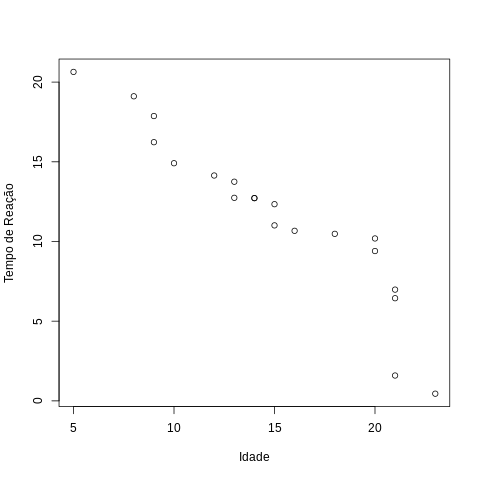

In [105]:
%%R
# Criar um ScatterPlot 
plot(Idade, Tempo, 
     xlab = 'Idade', 
     ylab = 'Tempo de Reação') # A medida que a idade aumenta, diminui o tempo de reação

In [106]:
%%R
# Criar um modelo de regressão relacionando a variável alvo tempo de reação e idade como variável preditora
modelo <- lm(Tempo ~ Idade)
modelo


Call:
lm(formula = Tempo ~ Idade)

Coefficients:
(Intercept)        Idade  
    25.8134      -0.9491  



In [0]:
%%R
# Calcular a reta de regressão
y <- a + b*x
reta <- 25.8134 - 0.9491 * Idade
# Coeficiente A é o primeiro intercepto do Call
# Coeficiente B é o segundo valor multiplicado da varíavel preditora

In [109]:
%%R
# Criar a reta de regressão. A reta contém as previsões que basicamente é a forma que fazemos o fit do modelo. 
# A partir de agora, com qualquer idade que tenhamos, conseguimos fazer a previsão baseado no cruzamento da reta. 
lines(Idade,reta)

R[write to console]: Error in plot.xy(xy.coords(x, y), type = type, ...) : 
  plot.new has not been called yet
Calls: <Anonymous> ... <Anonymous> -> withVisible -> lines -> lines.default -> plot.xy




Error in plot.xy(xy.coords(x, y), type = type, ...) : 
  plot.new has not been called yet
Calls: <Anonymous> ... <Anonymous> -> withVisible -> lines -> lines.default -> plot.xy


## Estudar a relação entre altura e peso

In [0]:
%%R
# Criar listas de altura e peso
alturas = c(176, 154, 138, 196, 132, 176, 181, 169, 150, 175)
pesos = c(82, 49, 53, 112, 47, 69, 77, 71, 62, 78)

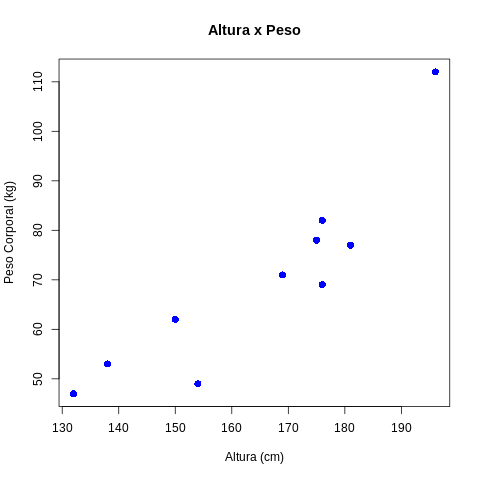

In [267]:
%%R
plot(alturas, pesos, pch = 16, cex = 1.3, col = "blue", 
     main = "Altura x Peso", 
     ylab = "Peso Corporal (kg)", 
     xlab = "Altura (cm)")
# Possível visualizar uma correlação positiva entre altura e peso


In [0]:
%%R
# Criar o modelo de regressão onde peso é a variável alvo e altura a variável preditora
modelo <- lm(pesos ~ alturas)

In [115]:
%%R
# Visualizando o modelo
modelo


Call:
lm(formula = pesos ~ alturas)

Coefficients:
(Intercept)      alturas  
   -70.4627       0.8528  



In [116]:
%%R
summary(modelo) # Ao impimir o sumário temos todos os detalhes do modelo


Call:
lm(formula = pesos ~ alturas)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.8746  -5.8428   0.7893   4.8001  15.3061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -70.4627    24.0148  -2.934 0.018878 *  
alturas       0.8528     0.1448   5.889 0.000366 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.854 on 8 degrees of freedom
Multiple R-squared:  0.8126,	Adjusted R-squared:  0.7891 
F-statistic: 34.68 on 1 and 8 DF,  p-value: 0.0003662



##Linha de Regressão com abline()

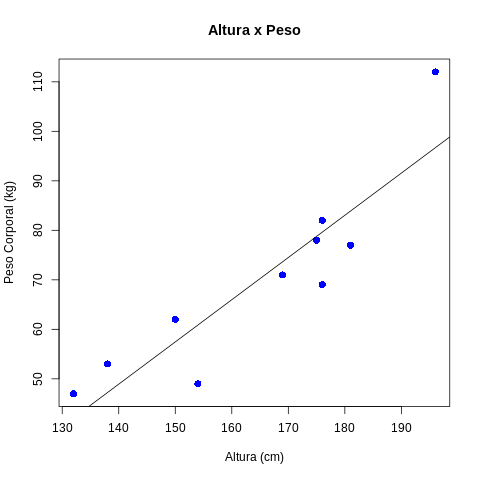

In [268]:
%%R
# Gerar linha de regressão repassando o valor dos coeficientes (intercepto e preditoras) a partir do retorno do  modelo de regressão 
plot(alturas, pesos, pch = 16, cex = 1.3, col = "blue", 
     main = "Altura x Peso", 
     ylab = "Peso Corporal (kg)", 
     xlab = "Altura (cm)")
# Possível visualizar uma correlação positiva entre altura e peso
abline(-70.4627, 0.8528)

## Analizar um novo conjunto de alturas. Testar o modelo com novo conjunto de dados. 

In [0]:
%%R
# Fazer as previsões de pesos com base na nova lista de alturas
alturas2 = data.frame(c(179, 152, 134, 197, 131, 178, 185, 162, 155, 172))

In [120]:
%%R
# Para aplicar a função predict, o conjunto de dados deve estar no formato de data.frame()
previsao <- predict(modelo, alturas2) # Os parâmetros são o nome do modelo e nova lista de entrada
previsao


       1        2        3        4        5        6        7        8 
79.63709 60.87462 47.22918 96.69388 42.11214 79.63709 83.90129 73.66721 
       9       10 
57.46326 78.78425 




*   Quando uma pessoa tiver uma altura de 1.79, provavelmente seu peso será de 79kg
*   Quando uma pessoa tiver uma altura de 1.52, provavelmente seu peso será de 60kg
*   Quando uma pessoa tiver uma altura de 1.34, provavelmente seu peso será de 47kg
*   Quando uma pessoa tiver uma altura de 1.97, provavelmente seu peso será de 96kg


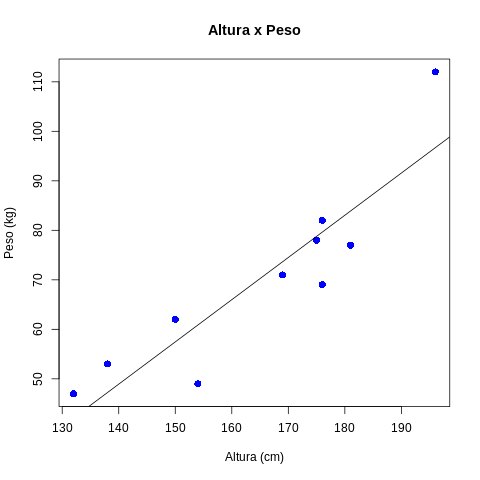

In [270]:
%%R
# Construir a linha de regressão usando como parâmetro exatamente o modelo de regressão linear
plot(alturas, pesos, pch = 16, cex = 1.3, 
     col = "blue", 
     main = "Altura x Peso", 
     ylab = "Peso (kg)", 
     xlab = "Altura (cm)")
abline(lm(pesos ~ alturas)) # Resultado é o mesmo e com menos programação 

In [123]:
%%R
# Obter o tamanho de uma das amostras de dados, o tamanho da lista de alturas 
num <- length(alturas)
num

[1] 10



1.  ### Criar um loop for para percorrer cada uma das alturas da lista 
2.  ### Chamar a função linas() para cada combinação de altura e peso
3.  ### Plotar o modelo em quatro áreas diferentes numa matriz c(2,2)
4.  ### O retorno será um conjunto de resíduos (erros do modelo). 



In [0]:
%%R
# Gerar uma linha de regressão com os valores residuais
for (k in 1: num)  
  lines(c(alturas[k], alturas[k]), 
        c(pesos[k], pesos[k]))

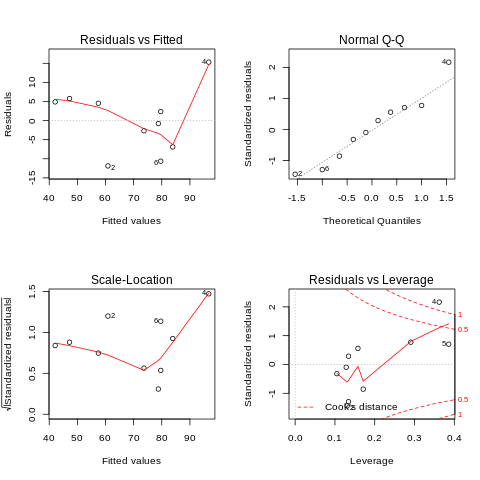

In [125]:
%%R
# Gerar gráficos com a distribuição dos resíduos
par(mfrow = c(2,2))
plot(modelo)

---

## Regressão Linear - Modelo de Machine Learning do Início ao Fim 
###  Definição do Problema: Prever as notas dos alunos com base em diversas métricas

In [0]:
# https://archive.ics.uci.edu/ml/datasets/Student+Performance
# Vamos prever a nota final (grade) dos alunos

In [136]:
%%R
# Carregando o dataset
df <- read.csv2('estudantes.csv')
head(df, n=1)

  school sex age address famsize Pstatus Medu Fedu    Mjob    Fjob reason
1     GP   F  18       U     GT3       A    4    4 at_home teacher course
  guardian traveltime studytime failures schoolsup famsup paid activities
1   mother          2         2        0       yes     no   no         no
  nursery higher internet romantic famrel freetime goout Dalc Walc health
1     yes    yes       no       no      4        3     4    1    1      3
  absences G1 G2 G3
1        6  5  6  6


In [139]:
%%R
str(df)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [0]:
%%R
# Explorando os dados
summary(df)

In [140]:
%%R
any(is.na(df)) # Perguntar se há algum valor na|not available|missing no dataframe

[1] FALSE


In [0]:
%%R
install.packages("ggplot2")
install.packages("ggthemes")
install.packages("dplyr")
library(ggplot2)
library(ggthemes)
library(dplyr)

### Perguntar apenas as colunas que são numéricas



1.   #### Chamar o atributo is.numeric para o dataframe
2.   #### Aplicar com a função sapply()
3.  



In [144]:
%%R
# Retornar colunas numéricas
colunas_numericas <- sapply(df, is.numeric)
colunas_numericas

    school        sex        age    address    famsize    Pstatus       Medu 
     FALSE      FALSE       TRUE      FALSE      FALSE      FALSE       TRUE 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
      TRUE      FALSE      FALSE      FALSE      FALSE       TRUE       TRUE 
  failures  schoolsup     famsup       paid activities    nursery     higher 
      TRUE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
     FALSE      FALSE       TRUE       TRUE       TRUE       TRUE       TRUE 
    health   absences         G1         G2         G3 
      TRUE       TRUE       TRUE       TRUE       TRUE 


In [0]:
%%R
# Filtrar as colunas numéricas para correlação, calcular a correlação entre toas as osbservações de variáveis|colunas que são numéricas
data_cor <- cor(df[,colunas_numericas])
data_cor
# A saída retorna todas as correlações numéricas do dataframe

In [148]:
%%R
head(data_cor)

                    age        Medu         Fedu  traveltime    studytime
age         1.000000000 -0.16365842 -0.163438069  0.07064072 -0.004140037
Medu       -0.163658419  1.00000000  0.623455112 -0.17163930  0.064944137
Fedu       -0.163438069  0.62345511  1.000000000 -0.15819405 -0.009174639
traveltime  0.070640721 -0.17163930 -0.158194054  1.00000000 -0.100909119
studytime  -0.004140037  0.06494414 -0.009174639 -0.10090912  1.000000000
failures    0.243665377 -0.23667996 -0.250408444  0.09223875 -0.173563031
              failures       famrel    freetime       goout         Dalc
age         0.24366538  0.053940096  0.01643439  0.12696388  0.131124605
Medu       -0.23667996 -0.003914458  0.03089087  0.06409444  0.019834099
Fedu       -0.25040844 -0.001369727 -0.01284553  0.04310467  0.002386429
traveltime  0.09223875 -0.016807986 -0.01702494  0.02853967  0.138325309
studytime  -0.17356303  0.039730704 -0.14319841 -0.06390368 -0.196019263
failures    1.00000000 -0.044336626  0.09198

In [0]:
%%R
# Pacotes para visualizar a análise de correlação
install.packages('corrgram')
install.packages('corrplot')
library(corrplot)
library(corrgram)

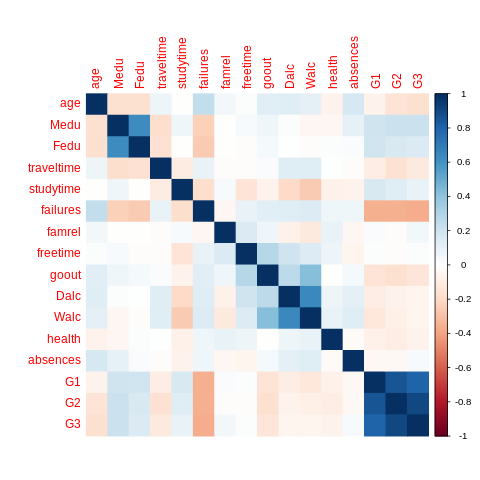

In [151]:
%%R
# Criar um corrplot passando "data_cor" como parâmetro, que contém todas as correlações já calculadas utilizar o método color para facilitar a visualização 
corrplot(data_cor, method = 'color')
# +1: alta correlação positiva
#  0: não há correlação 
# -1: alta correçação negativa

## Criando um Corgrama 

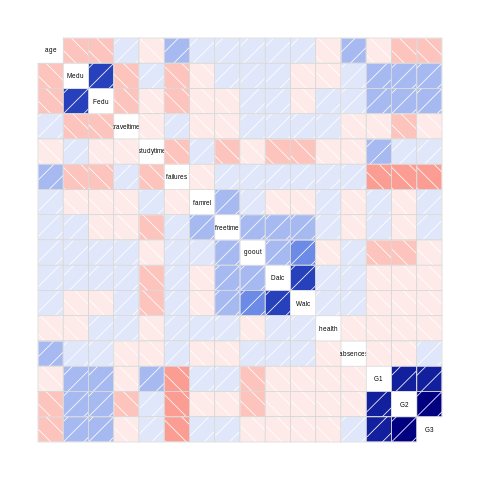

In [153]:
%%R
# Criando um corrgram simples - corgrama
corrgram(df)

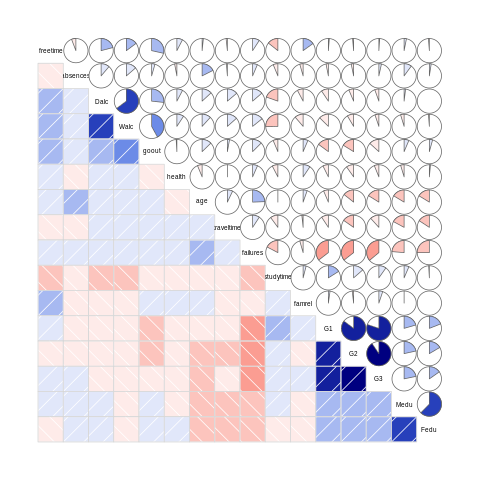

In [154]:
%%R
# Corgrama com atributos. Pequenos gráficos de pizza que demonstram a distribuição das variáveis
corrgram(df,
         order = TRUE, 
         lower.panel = panel.shade,
         upper.panel = panel.pie, 
         text.panel = panel.txt)

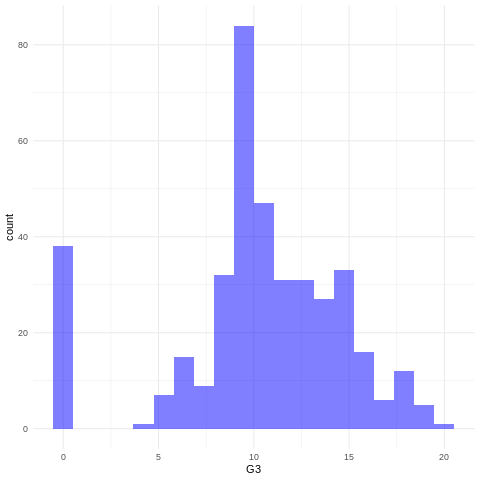

In [155]:
%%R
# Criando um histograma
ggplot(df, aes(x = G3)) + 
  geom_histogram(bins = 20, 
                 alpha = 0.5, fill = 'blue') + 
  theme_minimal()

In [0]:
%%R
# Treinando e Interpretando o Modelo
install.packages("caTools") 
library(caTools)



---



## Começar a Construção do Modelo

###sample.split()

In [0]:
%%R
# Criando as amostras de forma randômica
set.seed(101) 
?sample.split # Esta função faz a divisão entre dados de Treino e de Teste de maneira totalmente aleatória. 
amostra <- sample.split(df$age, SplitRatio = 0.70) # passar a variável $age como uma espécie de Index e SplitRatio de 70% para dados de Treino

## **Treinamos nosso modelo nos dados de treino**
##**Fazemos as predições nos dados de teste**



In [0]:
%%R
# Criar dados de treino - 70% dos dados, chamar o dataframe como parâmetro e indicar que Treino será onde amostra for igual a TRUE, índice igual a verdadeiro
treino = subset(df, amostra == TRUE)

In [0]:
%%R
# Criar dados de teste - 30% dos dados, chamar o dataframe como parâmetro e indicar que Teste será onde amostra for igual a FALSE, índice igual a falso
teste = subset(df, amostra == FALSE)

In [0]:
%%R
# Gerar o Modelo (Usando todos os atributos)
modelo_v1 <- lm(G3 ~ ., treino) # Modelo relacionado com todas as variáveis preditoras
modelo_v2 <- lm(G3 ~ G2 + G1, treino) # Modelo relacionado apenas com G2 + G1
modelo_v3 <- lm(G3 ~ absences, treino) # Modelo relacionado apenas com as faltas
modelo_v4 <- lm(G3 ~ Medu, treino) # Modelo relacionado apenas com educação da mãe

## Interpretando modelos diversos

In [0]:
%%R
summary(modelo_v1) # Multiple R-squared: 0.86
# Maior correlação com as variáveis
# G2
# Absences
# Famrel

In [166]:
%%R
summary(modelo_v2) # Multiple R-squared: 0.82 > Melhor versão 


Call:
lm(formula = G3 ~ G2 + G1, data = treino)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5559 -0.4030  0.3143  1.0137  3.4715 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.87861    0.40782  -4.606 6.28e-06 ***
G2           1.01370    0.06228  16.275  < 2e-16 ***
G1           0.12976    0.07050   1.841   0.0668 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.967 on 274 degrees of freedom
Multiple R-squared:  0.8211,	Adjusted R-squared:  0.8198 
F-statistic: 628.8 on 2 and 274 DF,  p-value: < 2.2e-16



In [167]:
%%R
summary(modelo_v3) # Multiple R-squared: 0.0002675


Call:
lm(formula = G3 ~ absences, data = treino)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4165  -2.4376   0.5201   3.5095   9.5412 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.41648    0.35607  29.254   <2e-16 ***
absences     0.01057    0.03897   0.271    0.786    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.641 on 275 degrees of freedom
Multiple R-squared:  0.0002675,	Adjusted R-squared:  -0.003368 
F-statistic: 0.07357 on 1 and 275 DF,  p-value: 0.7864



In [168]:
%%R
summary(modelo_v4) # Multiple R-squared: 0.06442


Call:
lm(formula = G3 ~ Medu, data = treino)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.813  -1.813   0.371   3.187   9.371 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.4452     0.7471   9.966  < 2e-16 ***
Medu          1.0919     0.2509   4.351 1.91e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.49 on 275 degrees of freedom
Multiple R-squared:  0.06442,	Adjusted R-squared:  0.06101 
F-statistic: 18.93 on 1 and 275 DF,  p-value: 1.909e-05



##Visualizando o Modelo e Fazendo Previsões

In [0]:
%%R
# Obter os resíduos da versão 1 do modelo
res <- residuals(modelo_v1)

In [172]:
%%R
# Converter o objeto de resíduos (taxas de erro) do modelo 1 para um dataframe
res <- as.data.frame(res)
head(res)

          res
1   0.9678451
5   1.1829980
6  -1.4096050
7   0.1125706
9   0.3814670
10  0.3221204


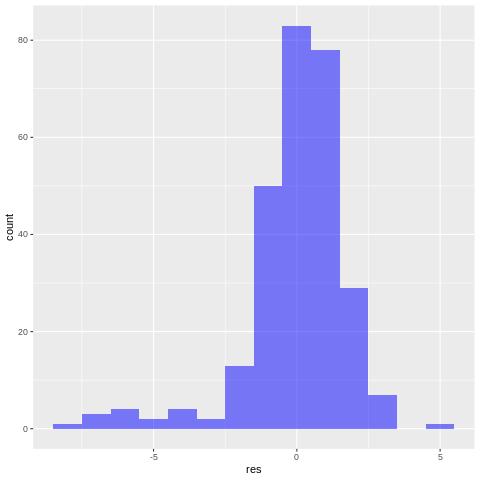

In [174]:
%%R
# Histograma dos resíduos
ggplot(res, aes(res)) +  
  geom_histogram(fill = 'blue', 
                 alpha = 0.5, 
                 binwidth = 1)

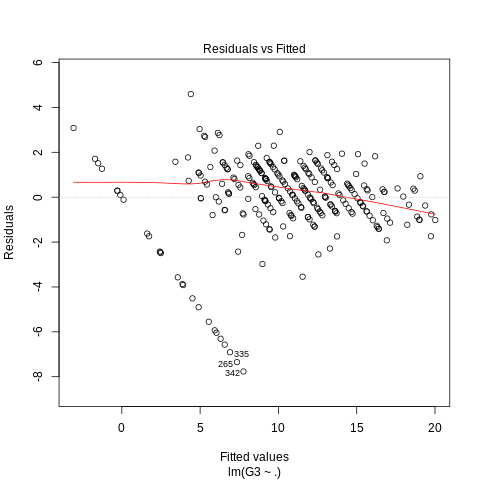

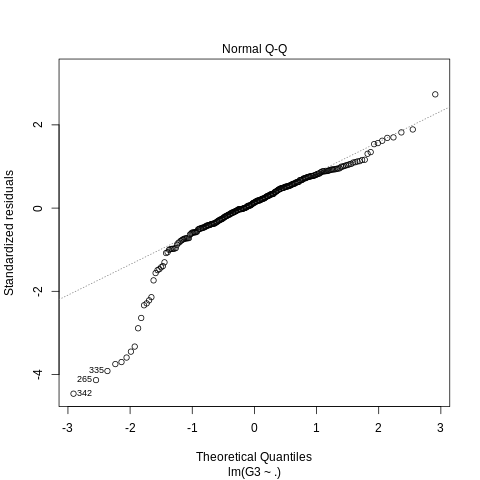

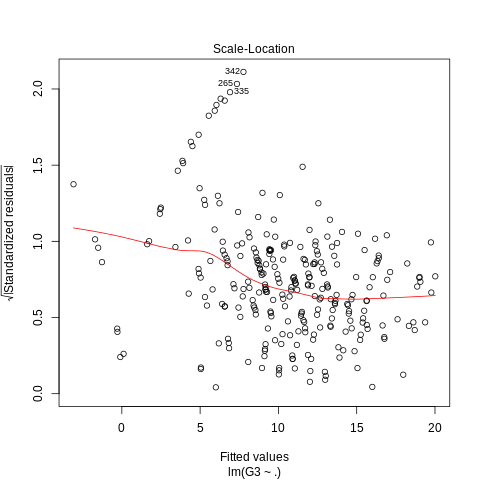

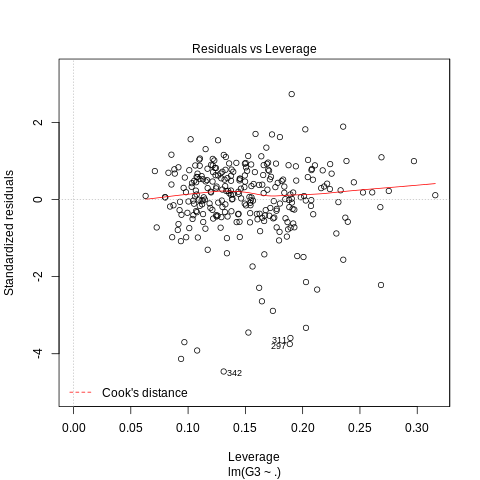

In [175]:
%%R
# Plot do Modelo
plot(modelo_v1)


## Realizar predições

In [176]:
%%R
# Fazer as predições
modelo_v1 <- lm(G3 ~ ., treino) # Modelo linear com todas as variáveis preditoras
prevendo_G3 <- predict(modelo_v1, teste) # Aplicar ao predict() modelo_v1 como modelo e teste como conjunto de teste para testar o modelo 
prevendo_G3

         2          3          4          8         15         16         20 
 3.8355327  7.1484561 13.2577944  5.0881001 14.9342910 13.8356794  8.3122171 
        23         29         31         33         34         35         39 
15.0841201 11.1862687 10.7402488 16.3790245  9.5412797 14.7359519 12.8006290 
        41         44         49         52         55         65         66 
 9.7124599  7.9732648 15.7596179 13.2100098 13.6036980  9.5747801 16.3548064 
        68         70         75         78         79         80         84 
 7.3657946 17.7999930 15.3677710 10.8592839  6.1210977  2.8719731 15.8441783 
        86         88         91        105        108        109        115 
 7.8946003 15.3998409  5.8109944 18.8049626 18.0500399 11.5405056  8.1000806 
       118        123        125        128        130        131        141 
13.4478990 13.1561603  5.7046408  4.0419078 18.6879834 -0.8438804  7.7359829 
       142        146        147        148        157        16

## Para facilitar, alocar os valores em dataframes distintos

In [177]:
%%R
# Visualizar os valores previstos e observados
resultados <- cbind(prevendo_G3, teste$G3) 
colnames(resultados) <- c('Previsto','Real') # O valor real são os dados históricos
resultados <- as.data.frame(resultados)
resultados
# Este dataframe compara o valor previsto com os dados históricos

      Previsto Real
2    3.8355327    6
3    7.1484561   10
4   13.2577944   15
8    5.0881001    6
15  14.9342910   16
16  13.8356794   14
20   8.3122171   10
23  15.0841201   16
29  11.1862687   11
31  10.7402488   12
33  16.3790245   16
34   9.5412797   12
35  14.7359519   15
39  12.8006290   11
41   9.7124599   11
44   7.9732648   11
49  15.7596179   14
52  13.2100098   13
55  13.6036980   13
65   9.5747801   10
66  16.3548064   15
68   7.3657946    6
70  17.7999930   16
75  15.3677710   11
78  10.8592839   11
79   6.1210977   10
80   2.8719731    5
84  15.8441783   15
86   7.8946003    8
88  15.3998409   14
91   5.8109944    8
105 18.8049626   18
108 18.0500399   18
109 11.5405056   13
115  8.1000806    9
118 13.4478990   13
123 13.1561603   13
125  5.7046408    8
128  4.0419078    9
130 18.6879834   18
131 -0.8438804    0
141  7.7359829    0
142  7.1090265    9
146 10.1712916   11
147  4.0182838    0
148 10.5152197   11
157 11.2150775   13
162  9.3540942    7
163 -1.2003631    0


In [178]:
%%R
  min(resultados)

[1] -1.832088


## Converter valores a zero caso sejam negativos (de acordo com cada problema de negócio)

In [0]:
%%R

# Criar a função de conversão de valores negativos
trata_zero <- function(x){
  if  (x < 0){
    return(0)
  }else{
    return(x)
  }
}

In [182]:
%%R
# Aplicando a função para tratar valores negativos em nossa previsão
resultados$Previsto <- sapply(resultados$Previsto, trata_zero)
resultados$Previsto

  [1]  3.835533  7.148456 13.257794  5.088100 14.934291 13.835679  8.312217
  [8] 15.084120 11.186269 10.740249 16.379024  9.541280 14.735952 12.800629
 [15]  9.712460  7.973265 15.759618 13.210010 13.603698  9.574780 16.354806
 [22]  7.365795 17.799993 15.367771 10.859284  6.121098  2.871973 15.844178
 [29]  7.894600 15.399841  5.810994 18.804963 18.050040 11.540506  8.100081
 [36] 13.447899 13.156160  5.704641  4.041908 18.687983  0.000000  7.735983
 [43]  7.109027 10.171292  4.018284 10.515220 11.215077  9.354094  0.000000
 [50]  9.249059  6.889791 14.026388  3.860742 10.754959  7.018143 15.021159
 [57]  7.363245 13.632509  8.267717 20.258370  7.981411  9.233961  5.477776
 [64] 12.585374 10.760175 15.451538  5.250457 10.031706 12.946821  0.000000
 [71]  0.000000  8.048100 11.166627  7.444088  8.737343  9.002407 10.477641
 [78] 12.671949 12.329503  8.997766  9.766693 12.057137  7.373368 12.869312
 [85]  9.950963 11.150977  9.360392  7.661558 15.258907 13.099843 10.778127
 [92]  9.142

## Calcular o Erro Médio - MSE

In [183]:
%%R
# Quão distantes o valores previstos estão dos valores observados
mse <- mean((resultados$Real - resultados$Previsto)^2)
print(mse)

[1] 4.411405


## Raiz Quadrada do Erro Quadrado Médio

In [186]:
%%R
# RMSE
rmse <- mse^0.5 # Elevar a 0.5
rmse

[1] 2.100335


## Coeficiente de Determinação

In [0]:
%%R
# sum of squared estimate of errors (SSE)
SSE = sum((resultados$Previsto - resultados$Real)^2)

In [0]:
%%R
# total sum of squares, the sum over all observations
SST = sum((mean(df$G3) - resultados$Real)^2)

In [189]:
%%R
# Calcular R-Squared com SSE e SST depois de todos os ajustes do modelo
# Ajuda a avaliar o nível de precisão do nosso modelo. Quanto maior, melhor, sendo 1 o valor ideal.
R2 = 1 - (SSE/SST)
R2

[1] 0.7779023




---



##Definindo o Problema: Analisando dados das casas de Boston, nos EUA e fazendo previsoes.

In [0]:
# The Boston Housing Dataset - http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
# O modelo deve prever a MEDV (Valor da Mediana de ocupação das casas). 

## Utilizar modelo de rede neural

In [190]:
%%R
# Carregar o pacote MASS que já traz o dataset Boston
library(MASS)

R[write to console]: 
Attaching package: ‘MASS’


R[write to console]: The following object is masked from ‘package:dplyr’:

    select




In [191]:
%%R
# Importar os dados do dataset Boston
set.seed(101)
dados <- Boston
head(dados)

     crim zn indus chas   nox    rm  age    dis rad tax ptratio  black lstat
1 0.00632 18  2.31    0 0.538 6.575 65.2 4.0900   1 296    15.3 396.90  4.98
2 0.02731  0  7.07    0 0.469 6.421 78.9 4.9671   2 242    17.8 396.90  9.14
3 0.02729  0  7.07    0 0.469 7.185 61.1 4.9671   2 242    17.8 392.83  4.03
4 0.03237  0  2.18    0 0.458 6.998 45.8 6.0622   3 222    18.7 394.63  2.94
5 0.06905  0  2.18    0 0.458 7.147 54.2 6.0622   3 222    18.7 396.90  5.33
6 0.02985  0  2.18    0 0.458 6.430 58.7 6.0622   3 222    18.7 394.12  5.21
  medv
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7


In [192]:
%%R
# Resumir dataset dados
  str(dados)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [193]:
%%R
  summary(dados)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [194]:
%%R
  any(is.na(dados)) # Verificar valores missing

[1] FALSE


## Carregar pacote de Redes Neurais

In [0]:
%%R
# Carregar o pacote para Redes Neurais
install.packages("neuralnet")
library(neuralnet)

## Abordar o pré-processamento de dados

*   É uma boa pratica normalizar os dados antes de treinar uma rede neural. 

*   Dependendo do conjunto de dados, evitar a normalização pode levar a resultados inúteis ou a um processo de treinamento muito complexo;

*   Na maioria das vezes o algoritmo não ira convergir antes do numero de iteracoes máximo permitido; 

*   Podemos escolher diferentes metodos para dimensionar os dados (normalizacao-z, escala min-max, etc ...);

*   Normalmente escala nos intervalos [0,1] ou [1,1] tende a dar melhores resultados. 





In [0]:
%%R
#  Caclular normalização 
maxs <- apply(dados, 2, max) # aplicar a função apply ao conjunto de dados, chamando a função max 
mins <- apply(dados, 2, min) # aplicar a função apply ao conjunto de dados, chamando a função min

In [198]:
%%R
# Imprimir os valores máximos para cada varíavel do dataset
  maxs

    crim       zn    indus     chas      nox       rm      age      dis 
 88.9762 100.0000  27.7400   1.0000   0.8710   8.7800 100.0000  12.1265 
     rad      tax  ptratio    black    lstat     medv 
 24.0000 711.0000  22.0000 396.9000  37.9700  50.0000 


In [199]:
%%R
# Imprimir os valores mínimos para cada variável do dataset
  mins

     crim        zn     indus      chas       nox        rm       age       dis 
  0.00632   0.00000   0.46000   0.00000   0.38500   3.56100   2.90000   1.12960 
      rad       tax   ptratio     black     lstat      medv 
  1.00000 187.00000  12.60000   0.32000   1.73000   5.00000 


In [0]:
%%R
# Normalizar com a função scale, passando dataset dados e aplicando valores máximos e mínimos
dados_normalizados <- as.data.frame(scale(dados, center = mins, scale = maxs - mins))

In [202]:
%%R
# Imprimir dados normalizados, todos os dados já na mesma escala
head(dados_normalizados)

          crim   zn      indus chas       nox        rm       age       dis
1 0.0000000000 0.18 0.06781525    0 0.3148148 0.5775053 0.6416066 0.2692031
2 0.0002359225 0.00 0.24230205    0 0.1728395 0.5479977 0.7826982 0.3489620
3 0.0002356977 0.00 0.24230205    0 0.1728395 0.6943859 0.5993821 0.3489620
4 0.0002927957 0.00 0.06304985    0 0.1502058 0.6585553 0.4418126 0.4485446
5 0.0007050701 0.00 0.06304985    0 0.1502058 0.6871048 0.5283213 0.4485446
6 0.0002644715 0.00 0.06304985    0 0.1502058 0.5497222 0.5746653 0.4485446
         rad        tax   ptratio     black      lstat      medv
1 0.00000000 0.20801527 0.2872340 1.0000000 0.08967991 0.4222222
2 0.04347826 0.10496183 0.5531915 1.0000000 0.20447020 0.3688889
3 0.04347826 0.10496183 0.5531915 0.9897373 0.06346578 0.6600000
4 0.08695652 0.06679389 0.6489362 0.9942761 0.03338852 0.6311111
5 0.08695652 0.06679389 0.6489362 1.0000000 0.09933775 0.6933333
6 0.08695652 0.06679389 0.6489362 0.9929901 0.09602649 0.5266667


In [0]:
%%R
install.packages("caTools")
library(caTools)

In [0]:
%%R
# Criar um índice para fazer a divisão em dados de Treino e dados de Teste
split = sample.split(dados_normalizados$medv, SplitRatio = 0.70)

In [0]:
%%R
# Aplicar o índice com os dados normalizados para fazer a divisão em dados de treino
  treino = subset(dados_normalizados, split == TRUE)

In [0]:
%%R
# Aplicar o índice com os dados normalizados para fazer a divisão em dados de teste
  teste = subset(dados_normalizados, split == FALSE)

In [211]:
%%R
# Obter o nome das colunas com names ()
coluna_nomes <- names(treino)
coluna_nomes

 [1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"   


# Agregar com programação



In [213]:
%%R
# Agregar
formula <- as.formula(paste("medv ~", paste(coluna_nomes[!coluna_nomes %in% "medv"], collapse = " + ")))
formula

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat


In [0]:
%%R
# Treinar o Modelo chamando o objeto formula
rede_neural <- neuralnet(formula, data = treino, hidden = c(5,3), linear.output = TRUE)

In [223]:
%%R
# Plot
plot(rede_neural)



R[write to console]: dev.new(): using pdf(file="Rplots7.pdf")



In [229]:
%%R
# Fazer previsões com os dados de teste, chamar a "rede_neural" (modelo) e os dados de teste
rede_neural_prev <- compute(rede_neural, teste[1:13])
rede_neural_prev

$neurons
$neurons[[1]]
              crim    zn      indus chas        nox        rm        age
1   1 0.000000e+00 0.180 0.06781525    0 0.31481481 0.5775053 0.64160659
4   1 2.927957e-04 0.000 0.06304985    0 0.15020576 0.6585553 0.44181256
6   1 2.644715e-04 0.000 0.06304985    0 0.15020576 0.5497222 0.57466529
9   1 2.303251e-03 0.125 0.27162757    0 0.28600823 0.3966277 1.00000000
18  1 8.743184e-03 0.000 0.28152493    0 0.31481481 0.4654148 0.81153450
20  1 8.086782e-03 0.000 0.28152493    0 0.31481481 0.4150220 0.68589083
21  1 1.399878e-02 0.000 0.28152493    0 0.31481481 0.3849396 0.98043254
22  1 9.505689e-03 0.000 0.28152493    0 0.31481481 0.4606246 0.88877446
29  1 8.617186e-03 0.000 0.28152493    0 0.31481481 0.5621767 0.94232750
32  1 1.515569e-02 0.000 0.28152493    0 0.31481481 0.4811267 1.00000000
36  1 6.502201e-04 0.000 0.20161290    0 0.23456790 0.4544932 0.67250257
38  1 8.297190e-04 0.000 0.20161290    0 0.23456790 0.4385898 0.39752832
39  1 1.896485e-03 0.000 0.2

In [230]:
%%R
# O retorno da previsao da Rede Neural é uma lista
str(rede_neural_prev)

List of 2
 $ neurons   :List of 3
  ..$ : num [1:139, 1:14] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "4" "6" "9" ...
  .. .. ..$ : chr [1:14] "" "crim" "zn" "indus" ...
  ..$ : num [1:139, 1:6] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "4" "6" "9" ...
  .. .. ..$ : NULL
  ..$ : num [1:139, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "4" "6" "9" ...
  .. .. ..$ : NULL
 $ net.result: num [1:139, 1] 0.483 0.649 0.414 0.261 0.278 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:139] "1" "4" "6" "9" ...
  .. ..$ : NULL


In [231]:
%%R
# Converter os dados de teste para o formato original, removendo a normalização que foi aplicada para o modelo
previsoes <- rede_neural_prev$net.result * (max(dados$medv) - min(dados$medv)) + min(dados$medv)
teste_convert <- (teste$medv) * (max(dados$medv) - min(dados$medv)) + min(dados$medv)
teste_convert

  [1] 24.0 33.4 28.7 16.5 17.5 18.2 13.6 19.6 18.4 14.5 18.9 21.0 24.7 34.9 21.2
 [16] 19.3 16.6 19.4 19.7 22.2 25.0 22.0 17.4 20.9 23.4 21.4 20.8 24.8 22.9 25.0
 [31] 18.6 21.7 22.8 18.8 18.5 18.3 20.5 16.2 19.2 14.4 13.4 11.8 15.6 17.8 21.5
 [46] 19.4 50.0 22.7 22.3 23.6 22.6 23.2 24.6 36.2 26.4 29.6 32.0 29.8 29.1 50.0
 [61] 22.5 24.4 23.3 27.5 31.6 31.5 29.0 24.3 24.5 33.2 35.4 20.1 27.1 33.1 28.4
 [76] 20.3 21.6 23.8 23.1 20.4 19.8 17.1 20.7 21.1 20.6 19.0 18.7 23.9 17.2 26.6
 [91] 24.1 30.1 20.6 21.7 21.9 50.0 50.0 50.0 15.0 13.9 13.3 13.1 10.2 10.4 10.9
[106]  8.8 10.5 12.7  7.2  8.5  5.0 11.9 27.9  7.0  8.3 14.3 11.7  8.4 15.4 14.1
[121] 16.1 13.5 14.9 20.0 19.5 20.2 19.9 13.8 16.7 14.6 23.0 23.7 21.8 19.1 15.2
[136] 23.1 16.8 22.4 22.0


In [232]:
%%R
# Calcular o Mean Squared Error - Medida de Erro do algoritmo 
MSE.nn <- sum((teste_convert - previsoes)^2)/nrow(teste)
MSE.nn

[1] 21.59414


In [233]:
%%R
#  Obter os erros de previsão
error.df <- data.frame(teste_convert, previsoes)
head(error.df)

   teste_convert previsoes
1           24.0  26.72540
4           33.4  34.19065
6           28.7  23.63925
9           16.5  16.73167
18          17.5  17.49900
20          18.2  17.80287


R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



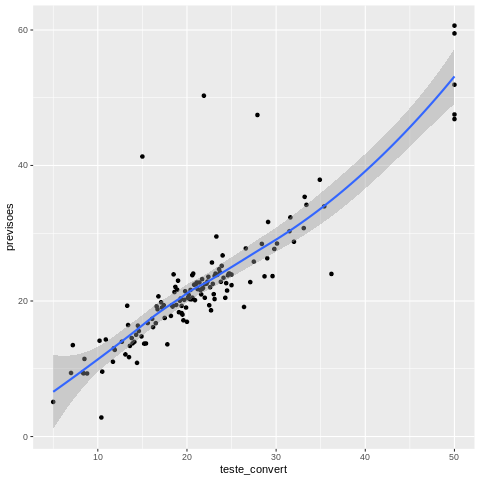

In [234]:
%%R
  # Plot dos erros
library(ggplot2)
ggplot(error.df, aes(x = teste_convert,y = previsoes)) + 
geom_point() + stat_smooth()
 # O modelo prevê a linha azul, o sombreado é o intervalo da margem de erro onde algumas previsões erraram

## Definindo o Problema: OCR - Optical Character Recognition

O modelo deve prever o caracter a partir do dataset fornecido. Usar um modelo SVM

In [239]:
%%R
## Explorando e preparando os dados
letters <- read.csv("letterdata.csv")
str(letters)

'data.frame':	20000 obs. of  17 variables:
 $ letter: Factor w/ 26 levels "A","B","C","D",..: 20 9 4 14 7 19 2 1 10 13 ...
 $ xbox  : int  2 5 4 7 2 4 4 1 2 11 ...
 $ ybox  : int  8 12 11 11 1 11 2 1 2 15 ...
 $ width : int  3 3 6 6 3 5 5 3 4 13 ...
 $ height: int  5 7 8 6 1 8 4 2 4 9 ...
 $ onpix : int  1 2 6 3 1 3 4 1 2 7 ...
 $ xbar  : int  8 10 10 5 8 8 8 8 10 13 ...
 $ ybar  : int  13 5 6 9 6 8 7 2 6 2 ...
 $ x2bar : int  0 5 2 4 6 6 6 2 2 6 ...
 $ y2bar : int  6 4 6 6 6 9 6 2 6 2 ...
 $ xybar : int  6 13 10 4 6 5 7 8 12 12 ...
 $ x2ybar: int  10 3 3 4 5 6 6 2 4 1 ...
 $ xy2bar: int  8 9 7 10 9 6 6 8 8 9 ...
 $ xedge : int  0 2 3 6 1 0 2 1 1 8 ...
 $ xedgey: int  8 8 7 10 7 8 8 6 6 1 ...
 $ yedge : int  0 4 3 2 5 9 7 2 1 1 ...
 $ yedgex: int  8 10 9 8 10 7 10 7 7 8 ...


In [0]:
%%R
# Dividir dados de treino e dados de teste de maneira estática - não é a ideal, mas funciona
letters_treino <- letters[1:16000, ]
letters_teste  <- letters[16001:20000, ]

##**Função KSVM** - {kernlab}

In [0]:
%%R
## Treinar o Modelo
install.packages("kernlab")
library(kernlab)

In [241]:
%%R
# Criando o modelo com o kernel vanilladot
letter_classifier <- ksvm(letter ~ ., 
                          data = letters_treino, 
                          kernel = "vanilladot")

 Setting default kernel parameters  


In [242]:
%%R
# Visualizar resultado do modelo, conjunto de coeficientes 
letter_classifier

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 7037 

Objective Function Value : -14.1746 -20.0072 -23.5628 -6.2009 -7.5524 -32.7694 -49.9786 -18.1824 -62.1111 -32.7284 -16.2209 -32.2837 -28.9777 -51.2195 -13.276 -35.6217 -30.8612 -16.5256 -14.6811 -32.7475 -30.3219 -7.7956 -11.8138 -32.3463 -13.1262 -9.2692 -153.1654 -52.9678 -76.7744 -119.2067 -165.4437 -54.6237 -41.9809 -67.2688 -25.1959 -27.6371 -26.4102 -35.5583 -41.2597 -122.164 -187.9178 -222.0856 -21.4765 -10.3752 -56.3684 -12.2277 -49.4899 -9.3372 -19.2092 -11.1776 -100.2186 -29.1397 -238.0516 -77.1985 -8.3339 -4.5308 -139.8534 -80.8854 -20.3642 -13.0245 -82.5151 -14.5032 -26.7509 -18.5713 -23.9511 -27.3034 -53.2731 -11.4773 -5.12 -13.9504 -4.4982 -3.5755 -8.4914 -40.9716 -49.8182 -190.0269 -43.8594 -44.8667 -45.2596 -13.5561 -17.7664 -87.4105 -107.1056 -37.0245 -30.7133 -112.3218 -32.9619 -27.2971 -35.5

## Taxa de Erro de 13.00%

In [244]:
%%R
# Avaliar a performance do modelo através dos dados de teste
letter_predictions <- predict(letter_classifier, letters_teste)
head(letter_predictions)

[1] U N V X N H
Levels: A B C D E F G H I J K L M N O P Q R S T U V W X Y Z


In [245]:
%%R
table(letter_predictions, letters_teste$letter)

                  
letter_predictions   A   B   C   D   E   F   G   H   I   J   K   L   M   N   O
                 A 144   0   0   0   0   0   0   0   0   1   0   0   1   2   2
                 B   0 121   0   5   2   0   1   2   0   0   1   0   1   0   0
                 C   0   0 120   0   4   0  10   2   2   0   1   3   0   0   2
                 D   2   2   0 156   0   1   3  10   4   3   4   3   0   5   5
                 E   0   0   5   0 127   3   1   1   0   0   3   4   0   0   0
                 F   0   0   0   0   0 138   2   2   6   0   0   0   0   0   0
                 G   1   1   2   1   9   2 123   2   0   0   1   2   1   0   1
                 H   0   0   0   1   0   1   0 102   0   2   3   2   3   4  20
                 I   0   1   0   0   0   1   0   0 141   8   0   0   0   0   0
                 J   0   1   0   0   0   1   0   2   5 128   0   0   0   0   1
                 K   1   1   9   0   0   0   2   5   0   0 118   0   0   2   0
                 L   0   0   0   

In [246]:
%%R
# Criando um vetor de TRUE/FALSE indicando previsoes corretas/incorretas
agreement <- letter_predictions == letters_teste$letter
table(agreement)

agreement
FALSE  TRUE 
  643  3357 


In [247]:
%%R
prop.table(table(agreement))

agreement
  FALSE    TRUE 
0.16075 0.83925 


In [0]:
%%R
## Otimizando o Modelo
set.seed(12345)

In [0]:
%%R
# Recriando o modelo com outro tipo de kernel
letter_classifier_rbf <- ksvm(letter ~ ., data = letters_treino, kernel = "rbfdot") # Mudança de kernel para "rbfdot"

In [0]:
%%R
# Novas previsoes
letter_predictions_rbf <- predict(letter_classifier_rbf, letters_teste)

In [256]:
%%R
# Compare os resultados com a primeira versao do modelo
agreement_rbf <- letter_predictions_rbf == letters_teste$letter
table(agreement_rbf)

agreement_rbf
FALSE  TRUE 
  278  3722 


In [257]:
%%R
prop.table(table(agreement_rbf))

agreement_rbf
 FALSE   TRUE 
0.0695 0.9305 
